In [1]:
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plot
import pandas
import random

In [2]:
data = pandas.read_csv("~/data/iris_data.csv", header = 0)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Use KMeans clustering to classify observations using pairs of features
# Compare results with species_class to determine whether features are viable for predicting species
# Since data is labeled, we know there are 3 clusers
kmModel = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 500, tol = 1e-4, random_state = 13)

In [4]:
sepalFeatures = data[['sepal_length', 'sepal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

indicesVersicolor = data['species_class'] == 'Iris-versicolor'
indicesVirginica = data['species_class'] == 'Iris-virginica'
indicesSetosa = data['species_class'] == 'Iris-setosa'


def plotData(features, feature1, feature2, indices, subplot, col, label):
    subplot.scatter(features.loc[indices, feature1],
                    features.loc[indices, feature2],
                    color = col,
                    lw = 1,
                    s = 50,
                    marker = 'o',
                    label = label)
    subplot.set_xlabel(feature1)
    subplot.set_ylabel(feature2)
    subplot.legend(loc = 1)



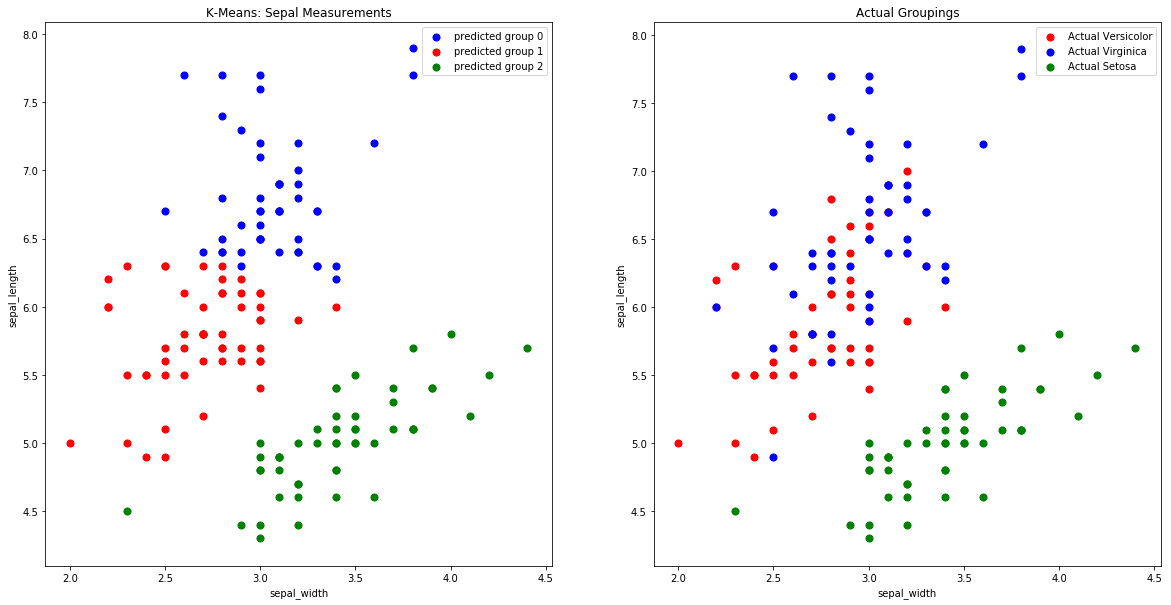

In [5]:

# Determine if sepal length & width can be clustered
sepalFeatures = data[['sepal_length', 'sepal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Sepal Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'sepal_width', 'sepal_length', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'sepal_width', 'sepal_length', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'sepal_width', 'sepal_length', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'sepal_width', 'sepal_length', indicesVersicolor, plot2, "red", "Actual Versicolor")
plotData(sepalFeatures, 'sepal_width', 'sepal_length', indicesVirginica, plot2, "blue", "Actual Virginica")
plotData(sepalFeatures, 'sepal_width', 'sepal_length', indicesSetosa, plot2, "green", "Actual Setosa")

In [6]:
'''
Notes on the above: sepal_width & sepal_length are good at identifying setosa from the other 2
Versicolor and Virginica are similar with just sepal measurements 
'''

'\nNotes on the above: sepal_width & sepal_length are good at identifying setosa from the other 2\nVersicolor and Virginica are similar with just sepal measurements \n'

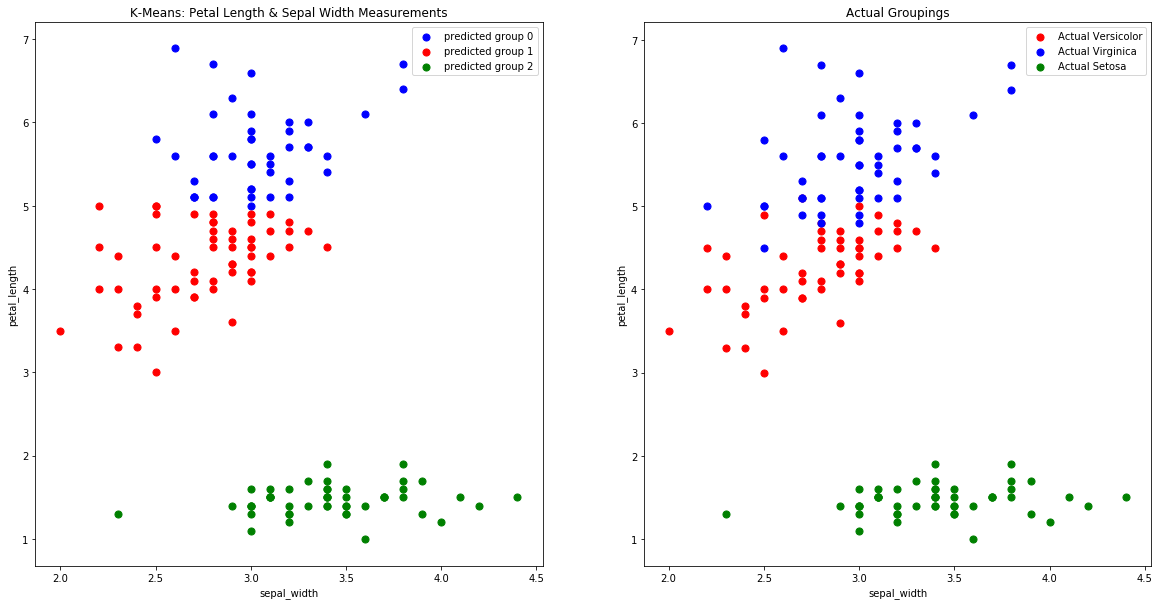

In [7]:
# Determine if sepal width & petal length can be clustered
sepalFeatures = data[['petal_length', 'sepal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Petal Length & Sepal Width Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'sepal_width', 'petal_length', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'sepal_width', 'petal_length', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'sepal_width', 'petal_length', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'sepal_width', 'petal_length', indicesVersicolor, plot2, "red", "Actual Versicolor")
plotData(sepalFeatures, 'sepal_width', 'petal_length', indicesVirginica, plot2, "blue", "Actual Virginica")
plotData(sepalFeatures, 'sepal_width', 'petal_length', indicesSetosa, plot2, "green", "Actual Setosa")

In [8]:
'''
Notes on the above: By using one measurement from petal and one measurement from petal
we can can create solid clusters that pretty accurately reflect the actual groupings
This is an improvement over just using sepal measurements. There appears to be a vertical relationship
in these clusters. With just petal_length one could imagine setting thresholds for each group. The value of sepal_width
appears to have no classification power.
'''

'\nNotes on the above: By using one measurement from petal and one measurement from petal\nwe can can create solid clusters that pretty accurately reflect the actual groupings\nThis is an improvement over just using sepal measurements. There appears to be a vertical relationship\nin these clusters. With just petal_length one could imagine setting thresholds for each group. The value of sepal_width\nappears to have no classification power.\n'

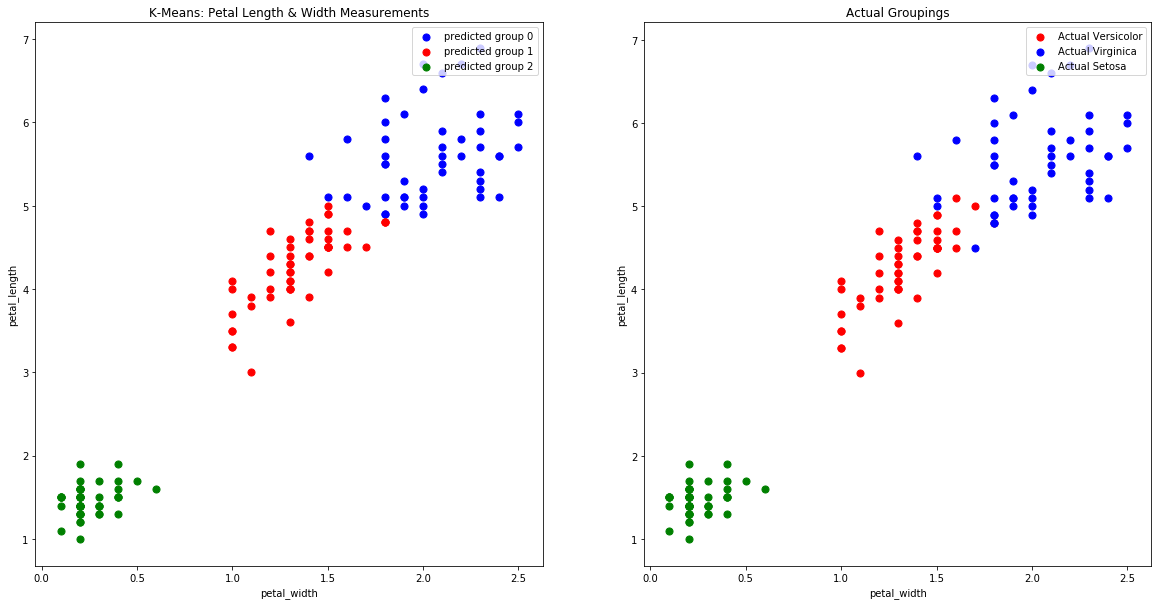

In [9]:
# Determine if petal length & width can be clustered
sepalFeatures = data[['petal_length', 'petal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Petal Length & Width Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'petal_width', 'petal_length', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'petal_width', 'petal_length', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'petal_width', 'petal_length', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'petal_width', 'petal_length', indicesVersicolor, plot2, "red", "Actual Versicolor")
plotData(sepalFeatures, 'petal_width', 'petal_length', indicesVirginica, plot2, "blue", "Actual Virginica")
plotData(sepalFeatures, 'petal_width', 'petal_length', indicesSetosa, plot2, "green", "Actual Setosa")

In [10]:
'''
Notes on the above: Here we only use petal measurements but we get a good distribution of clusters.
There's also a very linear relationship between the clusters. Suggests the petal length and with have
a 1 to 1 relationship and could be used in a simple univariate classifier to predict group. This confirms why
in the previous plot, we saw the vertical relationship we saw in previous plot.
'''

"\nNotes on the above: Here we only use petal measurements but we get a good distribution of clusters.\nThere's also a very linear relationship between the clusters. Suggests the petal length and with have\na 1 to 1 relationship and could be used in a simple univariate classifier to predict group. This confirms why\nin the previous plot, we saw the vertical relationship we saw in previous plot.\n"

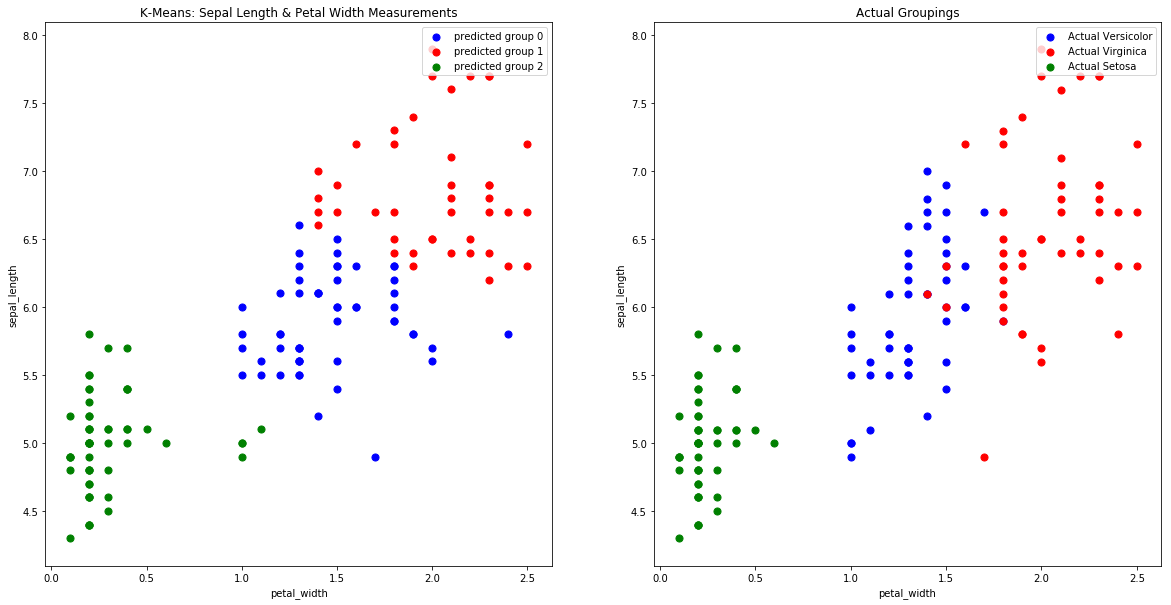

In [11]:
# Determine if sepal length & petal width can be clustered
sepalFeatures = data[['sepal_length', 'petal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Sepal Length & Petal Width Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'petal_width', 'sepal_length', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'petal_width', 'sepal_length', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'petal_width', 'sepal_length', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'petal_width', 'sepal_length', indicesVersicolor, plot2, "blue", "Actual Versicolor")
plotData(sepalFeatures, 'petal_width', 'sepal_length', indicesVirginica, plot2, "red", "Actual Virginica")
plotData(sepalFeatures, 'petal_width', 'sepal_length', indicesSetosa, plot2, "green", "Actual Setosa")

In [12]:
'''
Mixing petal and sepal measurements once again shows promise. The clusters aren't as tight as
when we just used petal measurements though.
'''

"\nMixing petal and sepal measurements once again shows promise. The clusters aren't as tight as\nwhen we just used petal measurements though.\n"

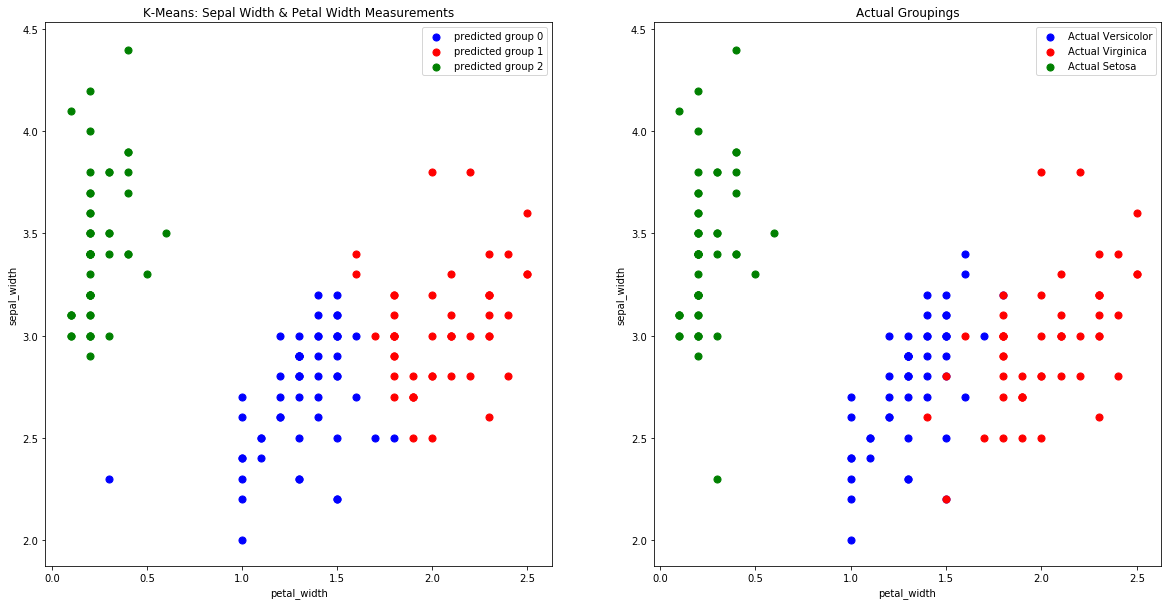

In [13]:
# Determine if sepal width & petal width can be clustered
sepalFeatures = data[['sepal_width', 'petal_width']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Sepal Width & Petal Width Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'petal_width', 'sepal_width', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'petal_width', 'sepal_width', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'petal_width', 'sepal_width', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'petal_width', 'sepal_width', indicesVersicolor, plot2, "blue", "Actual Versicolor")
plotData(sepalFeatures, 'petal_width', 'sepal_width', indicesVirginica, plot2, "red", "Actual Virginica")
plotData(sepalFeatures, 'petal_width', 'sepal_width', indicesSetosa, plot2, "green", "Actual Setosa")

In [14]:
'''
Notes on the above: Here I looked at whether the sepal_width or petal_width (or a combination of the two)
could be used to classify the species. Similar to a previous plot, it looks like petal alone is pretty predictive of the species.
Our KMeans clusters essentially separates based on the horizontal (petal) value without taking into consideration the septal_width.
'''

'\nNotes on the above: Here I looked at whether the sepal_width or petal_width (or a combination of the two)\ncould be used to classify the species. Similar to a previous plot, it looks like petal alone is pretty predictive of the species.\nOur KMeans clusters essentially separates based on the horizontal (petal) value without taking into consideration the septal_width.\n'

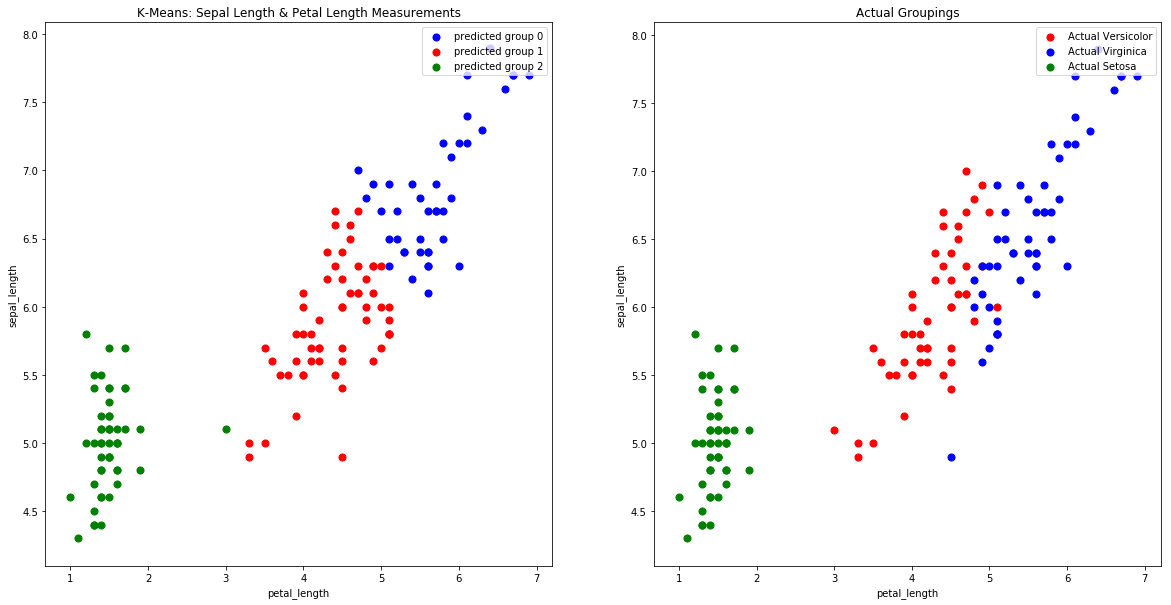

In [15]:
# Determine if sepal length & petal length can be clustered
sepalFeatures = data[['sepal_length', 'petal_length']]
sepalPredictions = kmModel.fit_predict(sepalFeatures)

indices0 = sepalPredictions == 0
indices1 = sepalPredictions == 1
indices2 = sepalPredictions == 2

figure1 = plot.figure(figsize = (20, 10))
plot1 = figure1.add_subplot(121, title = "K-Means: Sepal Length & Petal Length Measurements")
plot2 = figure1.add_subplot(122, title = "Actual Groupings")

plotData(sepalFeatures, 'petal_length', 'sepal_length', indices0,  plot1, "blue", "predicted group 0")
plotData(sepalFeatures, 'petal_length', 'sepal_length', indices1, plot1, "red", "predicted group 1")
plotData(sepalFeatures, 'petal_length', 'sepal_length', indices2, plot1, "green", "predicted group 2")

plotData(sepalFeatures, 'petal_length', 'sepal_length', indicesVersicolor, plot2, "red", "Actual Versicolor")
plotData(sepalFeatures, 'petal_length', 'sepal_length', indicesVirginica, plot2, "blue", "Actual Virginica")
plotData(sepalFeatures, 'petal_length', 'sepal_length', indicesSetosa, plot2, "green", "Actual Setosa")

In [16]:
'''
This shows that our kmeans clusters are favoring the petal measurements to be the main determination of cluster.
When you compare to the actual groupings on the right, it is true that petal lengths alone probably could be predictive of species,
but the tight KMeans clusters are missing of the nuance.

'''

'\nThis shows that our kmeans clusters are favoring the petal measurements to be the main determination of cluster.\nWhen you compare to the actual groupings on the right, it is true that petal lengths alone probably could be predictive of species,\nbut the tight KMeans clusters are missing of the nuance.\n\n'

In [17]:
##
## Idea: Make a Decision Tree to Predict the Species
##

In [18]:
##
## Prepare Train & Test Set
##

nUsers = len(data)
random.seed(13)
trainIndices = random.sample(range(0, nUsers), int(nUsers * 0.7))
testIndices = filter(lambda num: num not in trainIndices, range(0, nUsers))

trainDT = data.iloc[trainIndices, :]
testDT = data.iloc[testIndices, :]

In [19]:
trainDT.head()

,sepal_length,sepal_width,petal_length,petal_width,species_class
38,4.4,3.0,1.3,0.2,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa


In [20]:
treeModel = tree.DecisionTreeClassifier(random_state = 13)
treeModelFit = treeModel.fit(trainDT.drop('species_class', axis = 1), trainDT['species_class'])

In [21]:
testPredictions = treeModelFit.predict(testDT.drop('species_class', axis = 1))
mse = sum(testPredictions != testDT['species_class']) / float(nUsers)
mse

0.02666666666666667

In [22]:
# TODO: Add Decision Tree Visualizations
# TODO: Test a decision tree with just one petal measurement.
# TODO: What if didn't know there were 3 clusters?